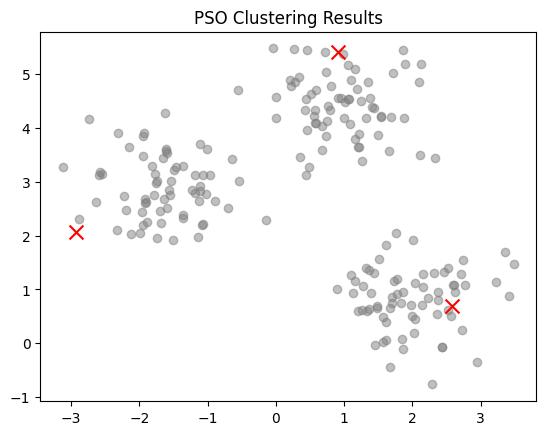

In [1]:
import numpy as np
import random
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Initialize dataset
X, _ = make_blobs(n_samples=200, centers=3, cluster_std=0.60, random_state=0)

# PSO parameters
num_particles = 50  # Number of particles
num_clusters = 3    # Number of clusters
num_iterations = 100  # Number of iterations
w = 0.5  # Inertia weight
c1 = 0.8  # Cognitive coefficient
c2 = 0.9  # Social coefficient

# Function to calculate the Euclidean distance
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# Fitness function: Sum of squared distances to centroids
def fitness(particle, X):
    total_distance = 0
    for i in range(len(X)):
        min_distance = float('inf')
        for j in range(num_clusters):
            dist = euclidean_distance(X[i], particle[j])
            if dist < min_distance:
                min_distance = dist
        total_distance += min_distance**2
    return total_distance

# PSO initialization
def initialize_particles():
    particles = []
    velocities = []
    for _ in range(num_particles):
        # Randomly initialize centroids within the data range
        centroids = np.array([X[random.randint(0, len(X)-1)] for _ in range(num_clusters)])
        particles.append(centroids)
        velocities.append(np.zeros_like(centroids))
    return particles, velocities

# Update velocity and position
def update_velocity_and_position(particle, velocity, personal_best, global_best):
    for i in range(num_clusters):
        # Update velocity using the PSO formula
        r1 = random.random()
        r2 = random.random()
        velocity[i] = w * velocity[i] + c1 * r1 * (personal_best[i] - particle[i]) + c2 * r2 * (global_best[i] - particle[i])

        # Update position by adding velocity
        particle[i] = particle[i] + velocity[i]

    return particle, velocity

# Main PSO algorithm
def pso_clustering():
    # Initialize particles and velocities
    particles, velocities = initialize_particles()
    personal_bests = particles.copy()
    global_best = min(particles, key=lambda p: fitness(p, X))
    global_best_fitness = fitness(global_best, X)

    # PSO iterations
    for _ in range(num_iterations):
        for i in range(num_particles):
            # Evaluate fitness for each particle
            current_fitness = fitness(particles[i], X)

            # Update personal best
            if current_fitness < fitness(personal_bests[i], X):
                personal_bests[i] = particles[i]

            # Update global best
            if current_fitness < global_best_fitness:
                global_best = particles[i]
                global_best_fitness = current_fitness

        # Update velocity and position of particles
        for i in range(num_particles):
            particles[i], velocities[i] = update_velocity_and_position(particles[i], velocities[i], personal_bests[i], global_best)

    return global_best

# Run PSO for clustering
best_centroids = pso_clustering()

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5)
for i in range(num_clusters):
    plt.scatter(best_centroids[i][0], best_centroids[i][1], c='red', marker='x', s=100)
plt.title('PSO Clustering Results')
plt.show()


In [ ]:
Data Clustering Using Particle Swarm Optimization (PSO)
Particle Swarm Optimization (PSO) is a population-based optimization technique inspired by the social behavior of birds flocking or fish schooling. It is particularly effective for solving optimization problems, including clustering.

In clustering, the goal is to group similar data points together in a way that minimizes the distance between the data points within the same cluster while maximizing the distance between points in different clusters. PSO can be applied to this problem by optimizing the centroids of clusters, where each particle represents a potential solution with cluster centroids as the positions.

Concept of Data Clustering Using PSO:
Particles: Each particle represents a potential solution, which consists of the centroids of the clusters. The number of particles in the swarm represents a population of potential cluster assignments.

Fitness Function: The fitness function for clustering can be defined as the sum of squared distances between data points and their corresponding cluster centroids (within-cluster variance). The goal is to minimize this distance.

Velocity and Position: The velocity of each particle updates its position (centroids of the clusters) in the search space. The position and velocity of each particle are updated based on its previous best position and the global best position found by the swarm.

Iterations: The particles are updated iteratively to refine the positions (centroids) and find the best clustering solution.

Steps in PSO for Clustering:
Initialize Particles: Randomly initialize the positions (centroids) of the particles and their velocities.
Evaluate Fitness: Compute the fitness of each particle by calculating the within-cluster variance.
Update Personal and Global Bests: Update each particle's personal best position (centroid positions) and the global best position based on the fitness values.
Update Position and Velocity: Update the particles' positions and velocities based on the personal best and global best positions.
Repeat: Repeat the process for a set number of iterations or until convergence.

Explanation of Code:
Dataset Generation:

We use make_blobs from sklearn.datasets to generate a synthetic dataset with 200 samples, 3 centers (clusters), and some noise.
PSO Parameters:

num_particles: Number of particles in the swarm.
num_clusters: The number of clusters for k-means clustering.
num_iterations: Number of iterations to run the algorithm.
w, c1, and c2: Parameters for inertia, cognitive, and social coefficients, respectively.
Fitness Function:

The fitness function calculates the sum of squared Euclidean distances from each data point to its nearest cluster centroid. The objective is to minimize this fitness value.
Particle Initialization:

Particles (representing the centroids) are randomly initialized from the data points.
Velocity and Position Update:

The velocity of each particle is updated based on the personal best and global best solutions. The position of each particle (the centroids) is also updated accordingly.
Main PSO Loop:

The particles are iterated through, and their fitness is calculated. The best solutions (personal and global best) are tracked and used to guide the swarm toward an optimal solution.
Visualization:

After the PSO algorithm converges, the centroids of the best solution are plotted, along with the original data points.
Key Concepts and Functions:
Position (Centroids): Each particle's position represents the set of centroids of clusters.
Velocity: The velocity determines how the centroids move across the solution space.
Personal Best and Global Best: Personal best is the best solution found by a particle, and global best is the best solution found by the entire swarm.
Fitness Function: Measures the quality of a solution. In this case, it calculates the sum of squared distances between data points and their assigned cluster centroids.
Conclusion:
Particle Swarm Optimization is a powerful optimization technique that can be effectively applied to clustering problems. In this case, PSO helps to optimize the placement of centroids in a way that minimizes the distance between data points and their assigned centroids. This method is especially useful for clustering large datasets where traditional methods like k-means might be inefficient.

In the plot, the red "x" markers represent the centroids of the clusters found by the Particle Swarm Optimization (PSO) algorithm. These centroids are the optimal points that the algorithm has identified as the centers of each cluster after running for the specified number of iterations